# **Regression & Its Evaluation | Assignment**


Question 1: What is Simple Linear Regression?
- Simple Linear Regression estimates how the dependent variable changes when the independent variable changes by one unit.

Question 2: What are the key assumptions of Simple Linear Regression?
- The key assumptions of Simple Linear Regression ensure that the model’s results are valid and reliable. These assumptions must hold true for the estimated coefficients and predictions to be meaningful.

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?
- Heteroscedasticity refers to a situation in regression analysis where the variance of the residuals (errors) is not constant across all levels of the independent variable(s).

Question 4: What is Multiple Linear Regression?
- Multiple Linear Regression estimates the linear relationship between the dependent variable and several predictors to predict outcomes or explain variation.

Question 5: What is polynomial regression, and how does it differ from linear
regression?
- Polynomial Regression is a type of regression analysis that models the relationship between the independent variable (X) and the dependent variable (Y) as an nth-degree polynomial rather than a straight line.



Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]


Intercept (β₀): 0.17999999999999794
Slope (β₁): 1.9800000000000004
Equation: Y = 0.18 + 1.98X


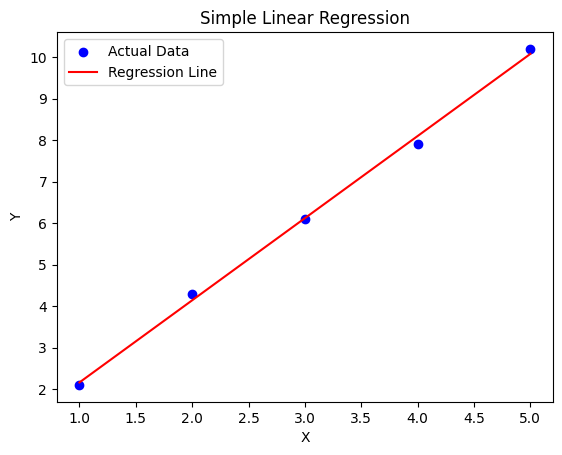

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict values
Y_pred = model.predict(X)

# Print results
print("Intercept (β₀):", intercept)
print("Slope (β₁):", slope)
print("Equation: Y = {:.2f} + {:.2f}X".format(intercept, slope))

# Plot the data and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]


In [2]:
# Import libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Given data
Area = np.array([1200, 1500, 1800, 2000])
Rooms = np.array([2, 3, 3, 4])
Price = np.array([250000, 300000, 320000, 370000])

# Combine predictors into a single matrix (2 features)
X = np.column_stack((Area, Rooms))
Y = Price

# Create and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Display the regression equation
print("Intercept (β₀):", intercept)
print("Coefficients (β₁, β₂):", coefficients)
print("Equation: Price = {:.2f} + {:.2f}*(Area) + {:.2f}*(Rooms)".format(
    intercept, coefficients[0], coefficients[1]
))

# Predict prices for the given data
Y_pred = model.predict(X)
print("\nPredicted Prices:", Y_pred)


Intercept (β₀): 103157.89473684214
Coefficients (β₁, β₂): [   63.15789474 34736.84210526]
Equation: Price = 103157.89 + 63.16*(Area) + 34736.84*(Rooms)

Predicted Prices: [248421.05263158 302105.26315789 321052.63157895 368421.05263158]


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]


Intercept (β₀): 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]
Polynomial Equation: Y = 0.06 + 1.94*X + 0.20*X^2


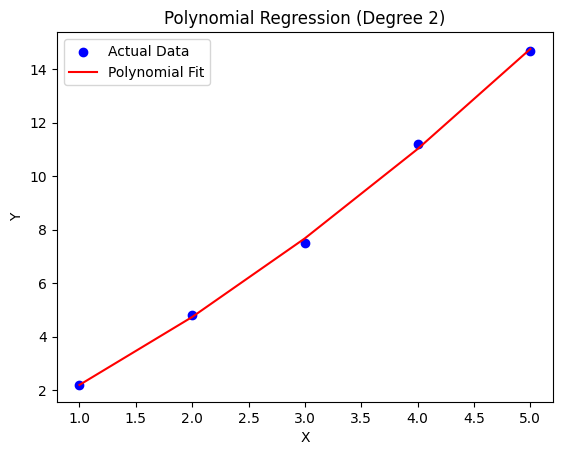

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])    # Dependent variable

# Transform X into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Linear Regression on transformed features
model = LinearRegression()
model.fit(X_poly, Y)

# Get coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (β₀):", intercept)
print("Coefficients:", coefficients)
print("Polynomial Equation: Y = {:.2f} + {:.2f}*X + {:.2f}*X^2".format(
    intercept, coefficients[1], coefficients[2]
))

# Predict values
Y_pred = model.predict(X_poly)

# Plot actual vs predicted
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]


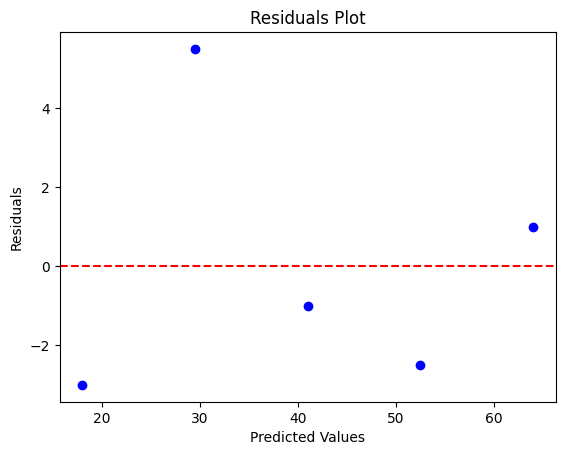

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

 - Detect issues → Transform or weight target (heteroscedasticity) → Remove/reduce correlated features or use regularization (multicollinearity) → Refit & evaluate → Consider alternative models if needed.